**Técnicas de Regressão Esparsa**
====================

> Presentado por

>> *Nelson Roldan Condori Colquehuanca*

> Disciplina:

>> *Álgebra Linear para Ciencia de Dados*


# Introdução
## Definição do Problema

Dado um conjunto de dados $(A, \mathbf{b})$, onde $A$ é a matriz de características (variáveis preditoras) e $\mathbf{b}$ é o vetor da variável alvo (ex: número de fatalidades), o objetivo da regressão linear é encontrar um vetor de coeficientes $\mathbf{x}$ que modele a relação entre as características e o alvo.

Este problema é expresso como a busca por uma solução para o sistema de equações lineares:
$$ A\mathbf{x} \approx \mathbf{b} $$

Onde:

* $A \in \mathbb{R}^{n \times p}$ é a matriz de dados, com $n$ observações e $p$ características.
* $\mathbf{x} \in \mathbb{R}^{p}$ é o vetor de coeficientes do modelo que desejamos encontrar.
* $\mathbf{b} \in \mathbb{R}^{n}$ é o vetor com os valores observados da variável alvo.

Como geralmente não existe uma solução exata que satisfaça todas as equações (devido à complexidade dos dados e à presença de ruído), o problema é abordado como a minimização de um vetor de erro.

## Minimização do Erro e Regularização

O vetor de erro ou resíduo, $\boldsymbol{\epsilon}$, é definido como a diferença entre os valores observados e os valores previstos pelo modelo:
$$ \boldsymbol{\epsilon} = \mathbf{b} - A\mathbf{x}$$
O objetivo é encontrar o vetor de coeficientes $\mathbf{x}$ que minimize uma função de custo, a qual se baseia na norma deste vetor de erro.

### Mínimos Quadrados Ordinários (OLS - Norma $L_2$)

O método implementado na classe `LinearRegression` do Scikit-learn é o OLS. Seu objetivo é minimizar a **norma $L_2$ ao quadrado** do erro. Esta função de custo é conhecida como a Soma dos Erros ao Quadrado (RSS, do inglês *Residual Sum of Squares*).

A função objetivo do OLS é:
$$\min_{\mathbf{x}} \| A\mathbf{x} - \mathbf{b} \|_2^2 = \min_{\mathbf{x}} \sum_{i=1}^{n} ( (A\mathbf{x})_i - b_i )^2 $$

Este método encontra os coeficientes que minimizam a soma das distâncias verticais ao quadrado entre cada ponto e a linha de regressão. Como discutido, suas características principais são:
* *Sensibilidade a outliers*: Ao elevar os erros ao quadrado, os pontos atípicos têm uma influência desproporcional no modelo final.
* *Modelo denso*: Geralmente, atribui um coeficiente não nulo a todas as variáveis preditoras, resultando em um modelo complexo.

**Mínimas Desviações Absolutas (Norma $L_1$ - Regressão Robusta)**

Uma abordagem alternativa e mais robusta consiste em minimizar a norma $L_1$ do vetor de erro. A norma $L_1$ é definida como a soma dos valores absolutos de seus componentes:

$$ \|\boldsymbol{\epsilon}\|_1 = \sum_{i=1}^{n} |\epsilon_i| $$

Este método, conhecido como Mínimas Desviações Absolutas, é **robusto** à presença de outliers. Ao não elevar os erros ao quadrado, a influência de um outlier grande é apenas proporcional à sua distância da linha de regressão, e não à sua distância ao quadrado. Como resultado, o modelo final (a linha contínua na imagem) se ajusta muito melhor à tendência geral da maioria dos dados, ignorando em grande parte o efeito do valor atípico.

### Regressão LASSO (Penalização com Norma $L_1$)

LASSO (*Least Absolute Shrinkage and Selection Operator*) é um método de **regressão regularizada**. Ele modifica a função de custo do OLS adicionando um termo de penalização baseado na **norma $L_1$ dos coeficientes**.

A função objetivo do LASSO é:
$$ \min_{\mathbf{x}} \left( \| A\mathbf{x} - \mathbf{b} \|_2^2 + \alpha \| \mathbf{x} \|_1 \right) $$

Esta função de custo é composta por duas partes:
* **Termo de Ajuste ($\| A\mathbf{x} - \mathbf{b} \|_2^2$)**: É a mesma Soma dos Erros ao Quadrado do OLS. Busca fazer com que o modelo se ajuste bem aos dados de treinamento.
* **Termo de Penalização ($\alpha \| \mathbf{x} \|_1$)**: É o produto de um hiperparâmetro de regularização, $\alpha$, e a norma $L_1$ do vetor de coeficientes $\mathbf{x}$. A norma $L_1$ é a soma dos valores absolutos dos coeficientes:

$$\| \mathbf{x} \|_1 = \sum_{j=1}^{p} |x_j|$$

O objetivo desta penalização é criar um modelo mais simples ou **esparso**. Ao forçar a soma dos valores absolutos dos coeficientes a ser pequena, o LASSO reduz (encolhe) muitos coeficientes e é capaz de levar alguns deles **exatamente a zero**.



# Download Dataset
https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2023/National/

# Importar Bibliotecas Requeridas


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
from google.colab import drive


plt.style.use('fivethirtyeight')

# Importando o Dataset e seleção de variáveis.

In [5]:
# 1. CONFIGURAÇÃO E CARGA DOS DADOS

print("="*80)
print("Análise Comparativa: Regressão de Mínimos Quadrados (OLS) vs LASSO")
print("Dataset: Fatality Analysis Reporting System (FARS)")
print("="*80)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Álgebra Linear CD 2025/Datos/accident.csv', low_memory=False)
df.head()

Análise Comparativa: Regressão de Mínimos Quadrados (OLS) vs LASSO
Dataset: Fatality Analysis Reporting System (FARS)


,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,PERMVIT,...,NOT_MINNAME,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS
0,1,Alabama,10001.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,20,22.0,10:00pm-10:59pm,45.0,45,88.0,Not Applicable (Not Transported),88.0,Not Applicable (Not Transported),1.0
1,1,Alabama,10002.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,8,2.0,2:00am-2:59am,23.0,23,88.0,Not Applicable (Not Transported),88.0,Not Applicable (Not Transported),1.0
2,1,Alabama,10003.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,48,23.0,11:00pm-11:59pm,8.0,8,88.0,Not Applicable (Not Transported),88.0,Not Applicable (Not Transported),1.0
3,1,Alabama,10004.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,...,0,19.0,7:00pm-7:59pm,44.0,44,99.0,Unknown,99.0,Unknown EMS Hospital Arrival Time,1.0
4,1,Alabama,10005.0,0.0,0.0,1.0,1.0,0.0,4.0,4.0,...,53,15.0,3:00pm-3:59pm,8.0,8,99.0,Unknown,99.0,Unknown EMS Hospital Arrival Time,1.0


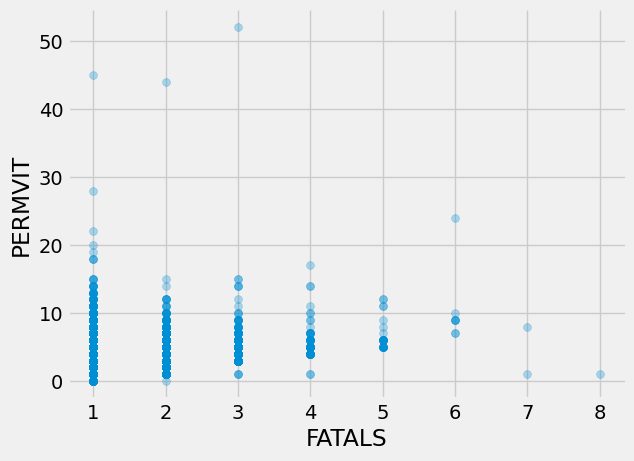

In [6]:
df.plot(kind='scatter', x='FATALS', y='PERMVIT', s=32, alpha=.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

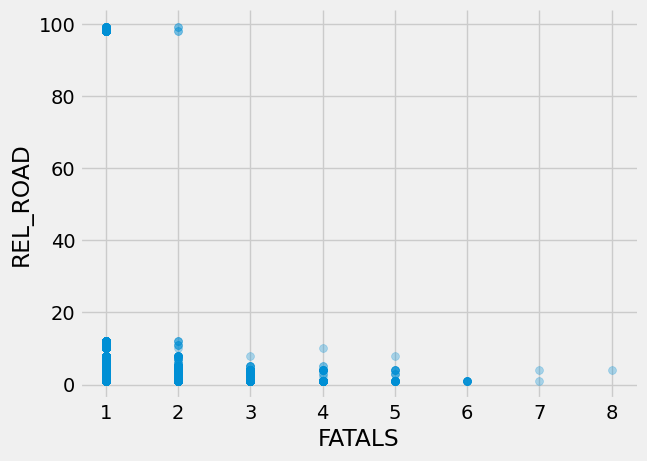

In [10]:
#Fatalidades vs Relação com Traficc
df.plot(kind='scatter', x='FATALS', y='REL_ROAD', s=32, alpha=.3)
plt.gca().spines[['top', 'right',]].set_visible(False)

A gente precisa de um norte. A nossa será ´´FATALS´´. Logo, escolhemos as variáveis que a gente acha que têm algo a ver com a varivel principal.

In [11]:
# SELEÇÃO DE VARIÁVEIS E PRÉ-PROCESSAMENTO
print("\n" + "="*80)
print(" PRÉ-PROCESSAMENTO DE DADOS")
print("="*80)

# --- Definir variável alvo e preditores ---
target_col = 'FATALS'

# Lista de preditores potenciais com base na documentação do FARS
available_predictors = [
    'NHS', 'ROUTE', 'RUR_URB',  ## Tipo de via
    'FUNC_SYS', 'RD_OWNER',  ## Sistema funcional - condições do tráfego
    'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND',  ## Condições
    'WEATHER', 'SCH_BUS',  ## Clima
    'HOSP_HR', 'HOSP_MN',  # Hospitalização
    'PERSONS', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS' ## Número de pessoas/veículos
]

# --- Criar dataset de trabalho e limpar valores nulos no alvo ---
df_work = df[[target_col] + available_predictors].copy()
valores_faltantes = df_work.isnull().sum()
print("Valores Faltantes:", valores_faltantes)
df_work.dropna(subset=[target_col], inplace=True)
print(f"Dataset de trabalho criado com {df_work.shape[0]} linhas.")

# --- Imputar valores faltantes nos preditores ---
# Para variáveis numéricas, usar a mediana
numeric_cols = df_work.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove(target_col)
for col in numeric_cols:
    if df_work[col].isnull().sum() > 0:
        median_val = df_work[col].median()
        df_work[col].fillna(median_val, inplace=True)
df_work


 PRÉ-PROCESSAMENTO DE DADOS
Valores Faltantes: FATALS        1051
NHS           1051
ROUTE         1051
RUR_URB       1051
FUNC_SYS      1051
RD_OWNER      1051
TYP_INT       1051
WRK_ZONE      1051
REL_ROAD      1051
LGT_COND      1051
WEATHER       1051
SCH_BUS       1051
HOSP_HR       1051
HOSP_MN       1051
PERSONS       1051
PEDS          1051
PERNOTMVIT    1051
VE_TOTAL      1051
VE_FORMS      1051
dtype: int64
Dataset de trabalho criado com 36603 linhas.


,FATALS,NHS,ROUTE,RUR_URB,FUNC_SYS,RD_OWNER,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,HOSP_HR,HOSP_MN,PERSONS,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS
0,1.0,0.0,2.0,1.0,5.0,1.0,1.0,0.0,4.0,2.0,1.0,0.0,88.0,88.0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,4.0,1.0,7.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0,88.0,88.0,1.0,0.0,0.0,1.0,1.0
2,1.0,0.0,4.0,1.0,5.0,2.0,1.0,0.0,4.0,2.0,1.0,0.0,88.0,88.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,4.0,1.0,7.0,2.0,1.0,0.0,4.0,2.0,2.0,0.0,99.0,99.0,3.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,1.0,2.0,0.0,99.0,99.0,4.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37649,1.0,1.0,3.0,1.0,3.0,1.0,1.0,0.0,1.0,2.0,11.0,0.0,21.0,57.0,6.0,0.0,0.0,5.0,5.0
37650,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0,4.0,2.0,1.0,0.0,88.0,88.0,1.0,0.0,0.0,1.0,1.0
37651,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,88.0,88.0,1.0,1.0,1.0,1.0,1.0
37652,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,9.0,37.0,6.0,0.0,0.0,2.0,2.0


In [12]:
# PREPARAÇÃO DOS DADOS PARA MODELAGEM

# Separar X e y
X = df_work.drop(columns=[target_col])
y = df_work[target_col]

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Padronização das características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Salvar os nomes das colunas para a interpretação posterior
feature_names = X.columns

# TREINAMENTO E AVALIAÇÃO DOS MODELOS

# Modelo 1: Regressão Linear Clássica (OLS)
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)
y_pred_ols = ols_model.predict(X_test_scaled)

# Modelo 2: Regressão LASSO com Validação Cruzada
# LassoCV é uma forma eficiente de encontrar o melhor alpha
lasso_cv = LassoCV(
    alphas=np.logspace(-5, 0, 100),
    cv=5,
    random_state=42,
    max_iter=10000,
    n_jobs=-1  # Usar todos os processadores disponíveis
)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha = lasso_cv.alpha_
print(f"Melhor alpha encontrado pelo LassoCV: {best_alpha:.6f}")

# Treinar o modelo final do LASSO com o melhor alpha
lasso_model = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

Melhor alpha encontrado pelo LassoCV: 0.001485


# Objetivos

In [13]:
# COMPARAÇÃO E ANÁLISE DOS RESULTADOS

print("\n" + "="*80)
print("COMPARAÇÃO E AVALIAÇÃO")
print("="*80)

# Métricas de desempenho
metrics_ols = {
    "MSE": mean_squared_error(y_test, y_pred_ols),
    "R²": r2_score(y_test, y_pred_ols),
    "MAE": mean_absolute_error(y_test, y_pred_ols),
    "Variáveis Não Nulas": np.sum(ols_model.coef_ != 0)
}
metrics_lasso = {
    "MSE": mean_squared_error(y_test, y_pred_lasso),
    "R²": r2_score(y_test, y_pred_lasso),
    "MAE": mean_absolute_error(y_test, y_pred_lasso),
    "Variáveis Não Nulas": np.sum(lasso_model.coef_ != 0)
}

# Tabela de comparação
comparison_df = pd.DataFrame({'OLS': metrics_ols, 'LASSO': metrics_lasso})
print("\n 1 Comparação de Desempenho e Esparsidade ")
print(comparison_df.round(7))

# Interpretação dos coeficientes
print("\n 2 Interpretação dos Coeficientes")
coef_df = pd.DataFrame({
    'Variável': feature_names,
    'Coef_OLS': ols_model.coef_,
    'Coef_LASSO': lasso_model.coef_
}).sort_values(by='Coef_LASSO', key=abs, ascending=False)

print("\n Top 15 variáveis mais importantes (segundo a magnitude no LASSO):")
print(coef_df.head(15).to_string(index=False))

variaveis_eliminadas = coef_df[coef_df['Coef_LASSO'] == 0]
print(f"\nO LASSO eliminou {len(variaveis_eliminadas)} variáveis.")


COMPARAÇÃO E AVALIAÇÃO

 1 Comparação de Desempenho e Esparsidade 
                          OLS      LASSO
MSE                   0.11673   0.116736
R²                    0.10132   0.101276
MAE                   0.14847   0.148362
Variáveis Não Nulas  18.00000  13.000000

 2 Interpretação dos Coeficientes

 Top 15 variáveis mais importantes (segundo a magnitude no LASSO):
  Variável  Coef_OLS  Coef_LASSO
   PERSONS  0.128409    0.124008
  VE_FORMS -0.036379   -0.032860
   RUR_URB -0.023629   -0.020080
PERNOTMVIT  0.009871    0.007725
   HOSP_HR  0.006312    0.005035
   SCH_BUS -0.006524   -0.004900
       NHS  0.006082    0.004093
  RD_OWNER  0.004777    0.003294
  FUNC_SYS  0.005674    0.003209
  LGT_COND  0.004425    0.002966
  REL_ROAD  0.004801    0.002248
  WRK_ZONE -0.003538   -0.001947
   TYP_INT -0.004147   -0.001105
     ROUTE -0.000814   -0.000000
   WEATHER  0.000356    0.000000

O LASSO eliminou 5 variáveis.


**DESEMPENHO:**
   - Ambos os modelos, OLS e LASSO, tiveram um desempenho preditivo muito similar.
   - OLS (R²=0.10132) vs. LASSO (R²=0.101276).
   - Isso indica que as variáveis eliminadas pelo LASSO não eram cruciais para a predição.

**ESPARSIDADE E SIMPLICIDADE:**
   - O OLS utilizou todas as 18 variáveis disponíveis.
   - O LASSO criou um modelo mais simples, selecionando apenas 13 variáveis.
   - Foi alcançada uma redução de 27,78% na complexidade do modelo.

 O LASSO entregou o mesmo resultado, mas com um time muito menor, mais barato e mais fácil de gerenciar. Ele cortou o ruído e focou no sinal. É a vitória da elegância sobre a força bruta.

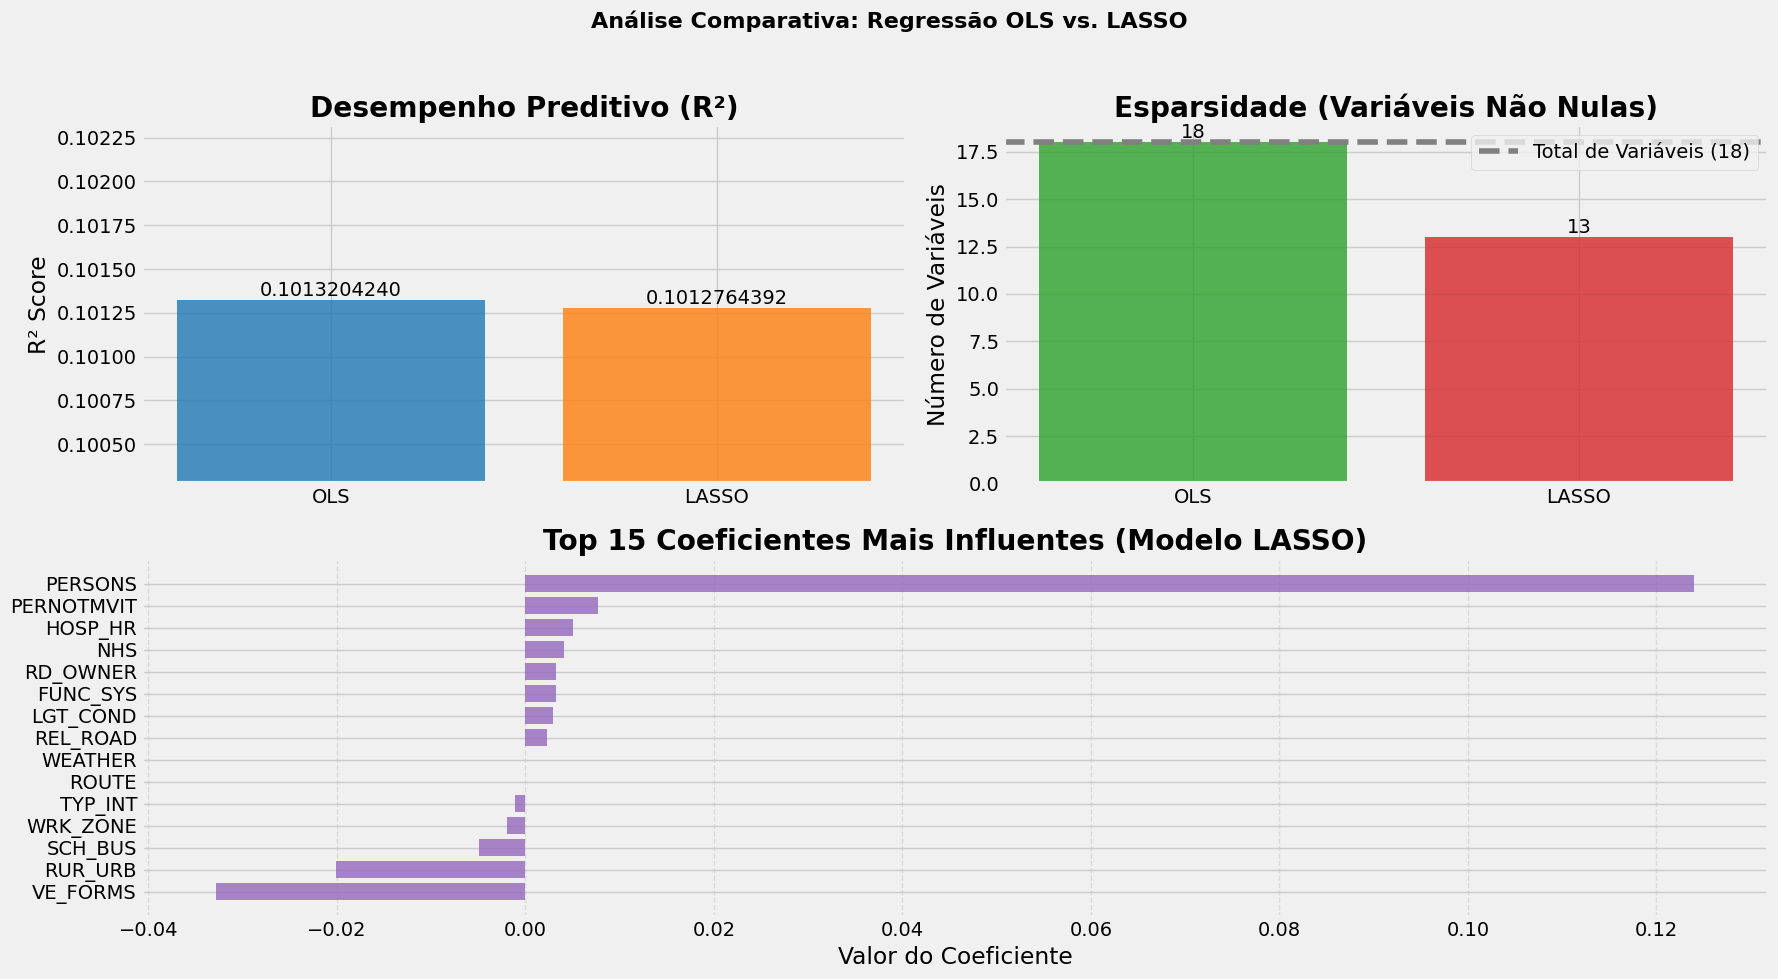

ANÁLISE AVANÇADA: COMPORTAMENTO DO LASSO


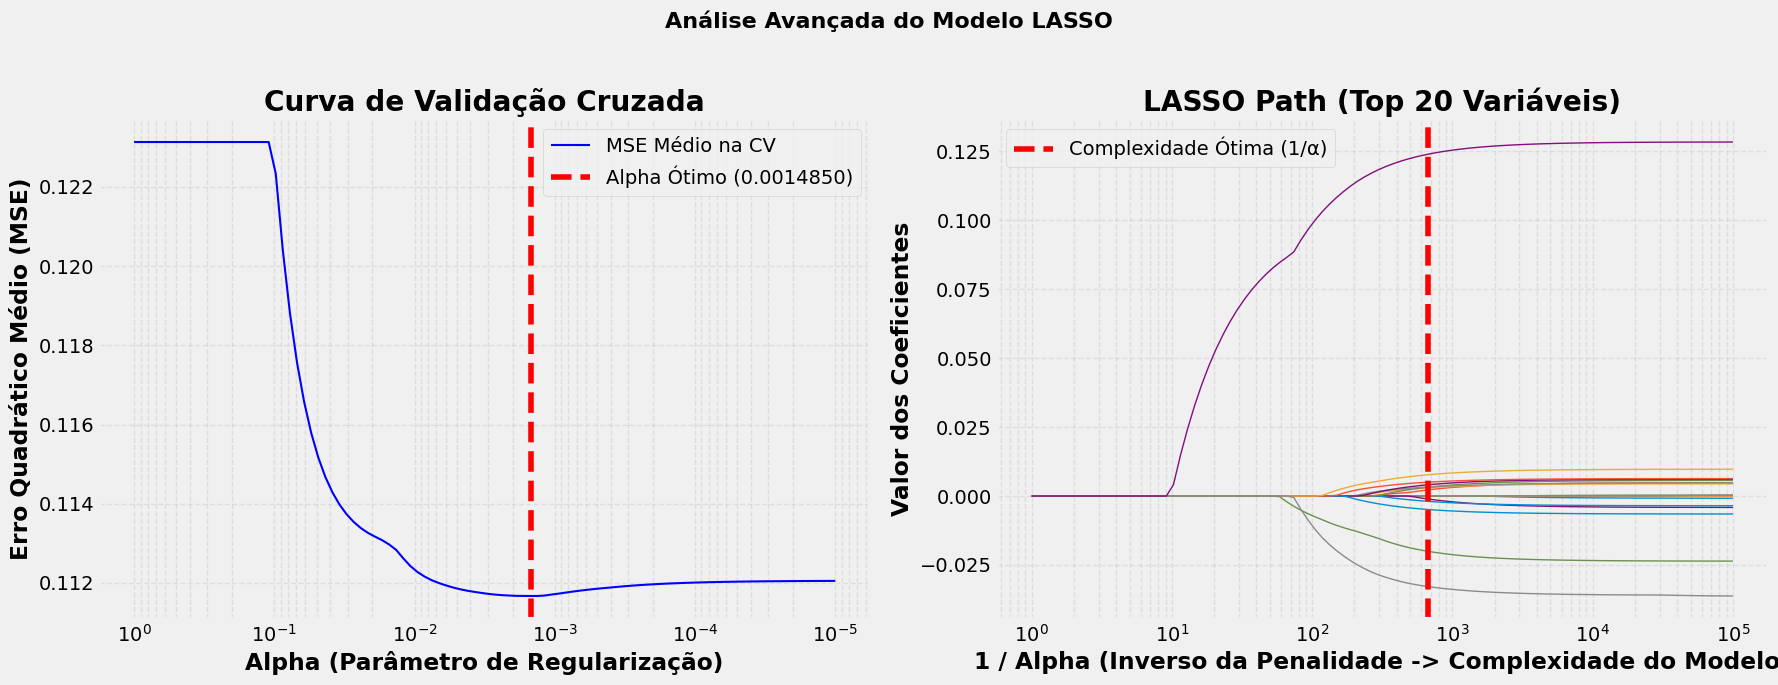

In [14]:
# Visualizações

fig = plt.figure(figsize=(18, 10))
fig.suptitle('Análise Comparativa: Regressão OLS vs. LASSO', fontsize=16, fontweight='bold')

# Gráfico 1: Comparação de R²
ax1 = plt.subplot(2, 2, 1)
models = ['OLS', 'LASSO']
r2_scores = [metrics_ols['R²'], metrics_lasso['R²']]
bars = ax1.bar(models, r2_scores, color=['#1f77b4', '#ff7f0e'], alpha=0.8)
ax1.set_title('Desempenho Preditivo (R²)', fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_ylim(bottom=max(0, min(r2_scores) - 0.001), top=max(r2_scores) + 0.001)
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.10f}', va='bottom', ha='center')

# Gráfico 2: Esparsidade (Número de variáveis)
ax2 = plt.subplot(2, 2, 2)
# Usando a chave do dicionário traduzida anteriormente
vars_used = [metrics_ols['Variáveis Não Nulas'], metrics_lasso['Variáveis Não Nulas']]
bars = ax2.bar(models, vars_used, color=['#2ca02c', '#d62728'], alpha=0.8)
ax2.axhline(y=len(feature_names), color='gray', linestyle='--', label=f'Total de Variáveis ({len(feature_names)})')
ax2.set_title('Esparsidade (Variáveis Não Nulas)', fontweight='bold')
ax2.set_ylabel('Número de Variáveis')
ax2.legend()
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Gráfico 3: Top 15 Coeficientes do LASSO
ax3 = plt.subplot(2, 1, 2)
# Usando os nomes de colunas traduzidos anteriormente
top_15_lasso = coef_df.head(15).sort_values(by='Coef_LASSO', ascending=True)
ax3.barh(top_15_lasso['Variável'], top_15_lasso['Coef_LASSO'], color='#9467bd', alpha=0.8)
ax3.set_title('Top 15 Coeficientes Mais Influentes (Modelo LASSO)', fontweight='bold')
ax3.set_xlabel('Valor do Coeficiente')
ax3.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('ols_vs_lasso_comparison.png', dpi=300)
plt.show()

# ANÁLISE AVANÇADA: CURVA DE VALIDAÇÃO E LASSO PATH

print("ANÁLISE AVANÇADA: COMPORTAMENTO DO LASSO")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análise Avançada do Modelo LASSO', fontsize=16, fontweight='bold')

# Gráfico 1: Curva de Validação Cruzada (MSE vs Alpha)
# Extrair resultados do LassoCV
mse_path = np.mean(lasso_cv.mse_path_, axis=1)
ax1.semilogx(lasso_cv.alphas_, mse_path, 'b-', label='MSE Médio na CV', linewidth=1.5)
ax1.axvline(best_alpha, linestyle='--', color='r', label=f'Alpha Ótimo ({best_alpha:.7f})')
ax1.set_xlabel('Alpha (Parâmetro de Regularização)', fontweight='bold')
ax1.set_ylabel('Erro Quadrático Médio (MSE)', fontweight='bold')
ax1.set_title('Curva de Validação Cruzada', fontweight='bold')
ax1.legend()
ax1.invert_xaxis()
ax1.grid(True, which="both", ls="--", alpha=0.5)

# Gráfico 2: LASSO Path (Trajetória dos Coeficientes)
# Calcular coeficientes para cada alpha
coefs = []
alphas = np.logspace(-5, 0, 100)
for a in alphas:
    lasso_temp = Lasso(alpha=a, max_iter=1000, random_state=42)
    lasso_temp.fit(X_train_scaled, y_train)
    coefs.append(lasso_temp.coef_)
coefs = np.array(coefs)
n_top_features = 20
important_indices = np.argsort(np.abs(lasso_model.coef_))[-n_top_features:]
inv_alphas = 1 / alphas

ax2.plot(inv_alphas,  coefs[:, important_indices], linewidth=1)
ax2.set_xscale('log')
ax2.axvline(1 / best_alpha, linestyle='--', color='r', label=f'Complexidade Ótima (1/α)')
ax2.set_xlabel('1 / Alpha (Inverso da Penalidade -> Complexidade do Modelo)', fontweight='bold')
ax2.set_ylabel('Valor dos Coeficientes', fontweight='bold')
ax2.set_title(f'LASSO Path (Top {n_top_features} Variáveis)', fontweight='bold')
ax2.legend()
ax2.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('lasso_advanced_analysis.png', dpi=300)
plt.show()

## Mergulho Profundo na Mente do LASSO:
Aqueles dois últimos gráficos são como um raio-X do cérebro do LASSO. Eles mostram como ele pensa.

**A Curva de Validação (O Vale da Sabedoria):**
Esse gráfico da esquerda é a jornada do LASSO em busca do equilíbrio. Pensa nele como um equilibrista na corda bamba.

Lá na direita (alpha pequeno): A penalidade é uma piada. O LASSO se comporta como o OLS, tentando decorar os dados de treino. Ele fica supercomplexo e, quando vai pra prova (dados de teste), tropeça feio. É o overfitting.

Lá na esquerda (alpha grande): A penalidade é um tirano! O LASSO fica com tanto medo de gastar seu orçamento que demite quase todo mundo, tornando-se simples demais. Ele não consegue nem aprender o básico. É o underfitting.

O Fundo do Vale (a linha vermelha): Ah, aqui está o nirvana! É o alpha perfeito, o ponto exato onde o modelo não é nem complexo demais, nem simples demais. É o ponto de menor erro, a sabedoria máxima. É o valor que nosso código escolheu.

**O "LASSO Path" (A Dança dos Coeficientes):**
(Imagine seu gráfico aqui)
Esse gráfico da direita é pura poesia visual. Cada linha colorida é uma variável lutando pela sua vida.

No começo (eixo X à direita, 1/alpha grande): A penalidade é baixa. As variáveis estão livres, leves e soltas, cada uma com sua importância.

À medida que a gente anda pra esquerda: O alpha aumenta, a pressão sobe. Você pode ver as linhas, uma por uma, sendo espremidas, encolhendo em direção ao zero. É uma carnificina! As mais fracas morrem primeiro, snap, zeradas. As mais fortes e resilientes lutam até o fim.

A Linha Vermelha: Ela marca onde nosso modelo final decidiu parar. Todas as linhas que já cruzaram o zero antes desse ponto foram as variáveis que o LASSO considerou "dispensáveis". As que ainda estão de pé são as nossas campeãs, a tropa de elite que sobreviveu e que carrega o poder de previsão do nosso modelo.


Então, no fim das contas, essa análise não é só sobre números. É sobre descobrir a história que os dados querem contar e encontrar o melhor contador de histórias (o modelo) para fazer isso: um que seja claro, conciso e que saiba separar o joio do trigo. E hoje, o LASSO foi esse contador.

**CONCLUSÃO:**
   - Neste cenário, **o LASSO é o modelo preferido**. Ele oferece a mesma capacidade preditiva que o OLS, porém com um modelo mais simples, mais interpretável e menos propenso ao sobreajuste (*overfitting*) com novos dados.
   - Ele demonstra com sucesso a principal vantagem da regularização L1: a capacidade de realizar uma **seleção de características automática** e eficiente.